#Explorating Data Analysis

##Haberman's Survival Data Set##


*   The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.
*   Attribute Information:
  *  Age of patient at time of operation (numerical)
  *  Patient's year of operation (year - 1900, numerical)
  *  Number of positive axillary nodes detected (numerical)
  *  Survival status (class attribute)

     1 = the patient survived 5 years or longer
     
     2 = the patient died within 5 year



###Objective###
Clssify the survival of patients who had undergone surgery for breast cancer as belonging to one of the 2 classes given the 3 features.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading Haberman.csv 
from google.colab import files
file = files.upload()

Saving haberman.csv to haberman.csv


In [3]:
# how many data points and features?
df = pd.read_csv('haberman.csv')
df.shape
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


*  Haberman dataset have 306 data points and 4 features.

In [4]:
# What are the column names in the dataset?
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

*  It has 4 features/attributes.

In [5]:
# How many data points for each class are present?
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

*  225 patients survive 5 years or longer after surgery
*  81 patients survive less than 5 years after surgery
*  Imbalanced dataset

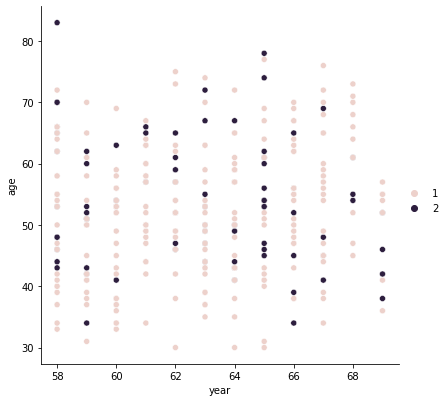

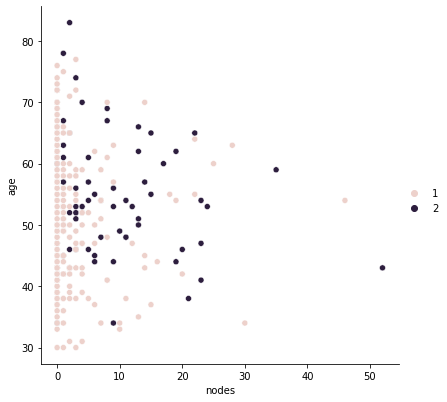

In [6]:
# sns.set_style("whitegrid");
# sns.FacetGrid(df, hue="status") \
#    .map(plt.scatter, "age", "year") \
#    .add_legend();
# plt.show();


g = sns.FacetGrid(df, height=5.5, aspect=1)
g.map_dataframe(sns.scatterplot, x="year", y="age", hue="status")
g.set_axis_labels("year", "age")
g.add_legend()

g = sns.FacetGrid(df, height=5.5, aspect=1)
g.map_dataframe(sns.scatterplot, x="nodes", y="age", hue="status")
g.set_axis_labels("nodes", "age")
g.add_legend()

Observation(s):
  *  using age and year less people die in 30-40 age group.
  *  using age and nodes:- we can differentiate all patients had surgery with no nodes survive.

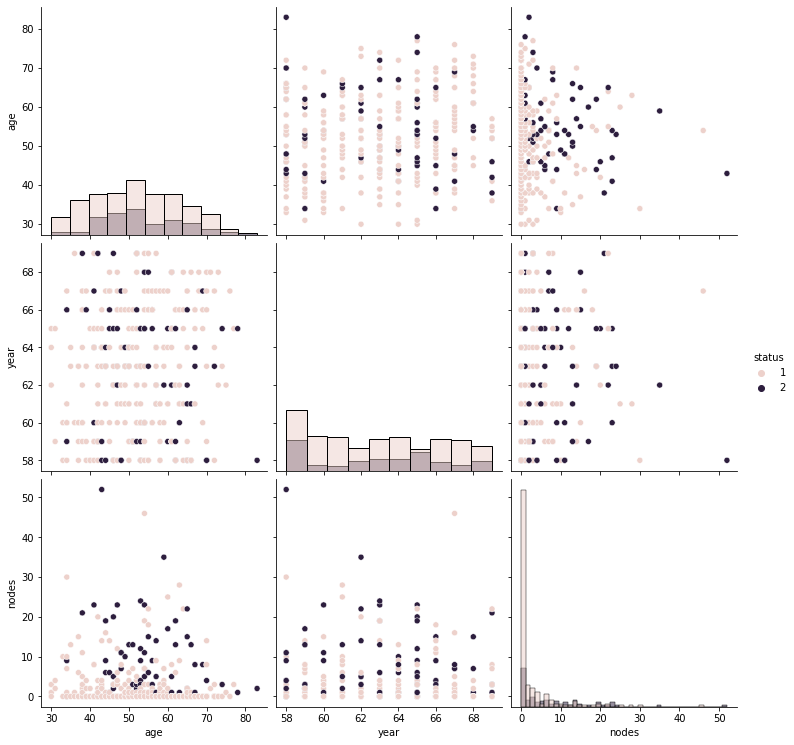

In [7]:
# plt.close();
# sns.set_style("whitegrid");
# sns.pairplot(df, hue="status", height=3.5, aspect=1);
# plt.show()

sns.pairplot(df, hue="status", diag_kind="hist", height=3.5, aspect=1)

Observation(s)
*  None of the feature is best to differenciate.

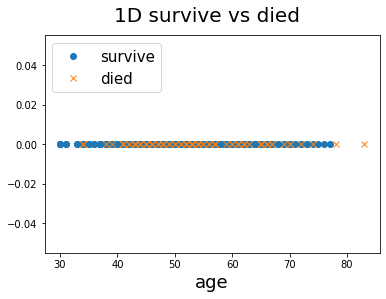

In [34]:
import numpy as np
haberman_1 = df.loc[df["status"] == 1];
haberman_2 = df.loc[df["status"] == 2];
fig = plt.figure()
plt.plot(haberman_1["age"], np.zeros_like(haberman_1['age']), 'o')
plt.plot(haberman_2["age"], np.zeros_like(haberman_2['age']), 'x')
fig.suptitle('1D survive vs died', fontsize=20)
plt.xlabel('age', fontsize=18)
plt.legend(['survive', 'died'],loc="upper left", fontsize=15)

plt.show()

*  Imposible to visualize anything because of overlapping of points.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


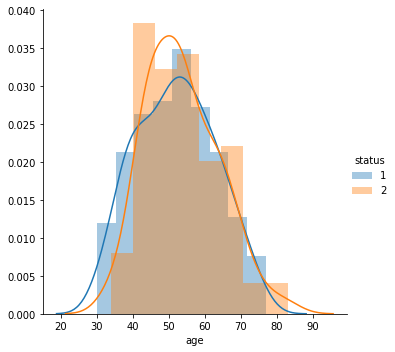

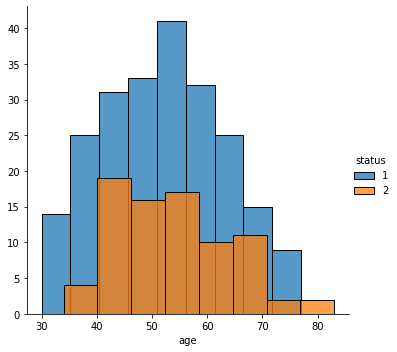

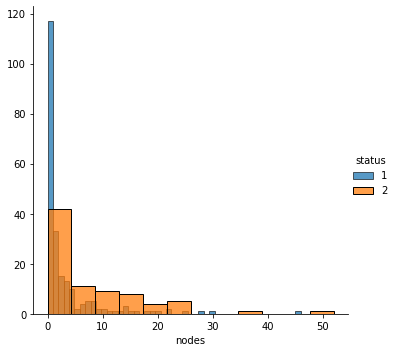

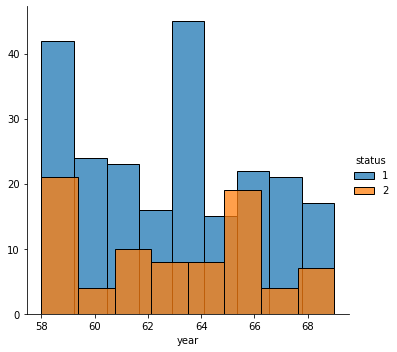

In [9]:
sns.FacetGrid(df, hue="status", height=5, aspect=1) \
   .map(sns.distplot, "age") \
   .add_legend();

sns.FacetGrid(df, hue="status", height=5, aspect=1) \
   .map(sns.histplot, "age") \
   .add_legend();

sns.FacetGrid(df, hue="status", height=5, aspect=1) \
   .map(sns.histplot, "nodes") \
   .add_legend();

sns.FacetGrid(df, hue="status", height=5, aspect=1) \
   .map(sns.histplot, "year") \
   .add_legend();

plt.show();

Observation(s):
*  patients whose age is less then 40 has max. probabilty to survive and age between 60-78 have almost same probabity and after age 78 less probability to survive.
*  patient age below 34 is survived longer.
*  patient age above 75 around died withiin 5 year.
*  having 0 nodes all survived.
*  maximum surgery occur in 1958-1959 and 1963-1964.
*  survival rate of year 1963-1964 is more compared to all other years.
*  In 1963-1964 mostly people who died have age more then 50 year. (by pairplot)

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


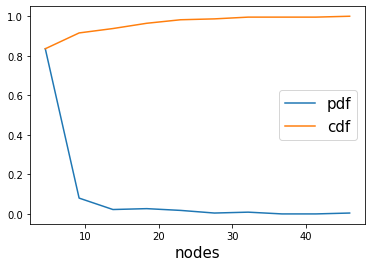

In [39]:
counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('nodes', fontsize=15)
plt.legend(['pdf', 'cdf'],loc='center right', fontsize=15)
plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


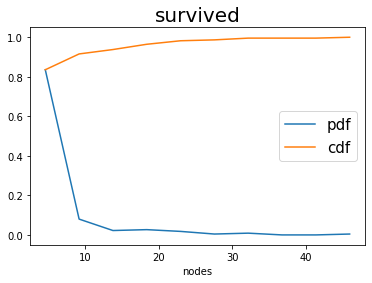

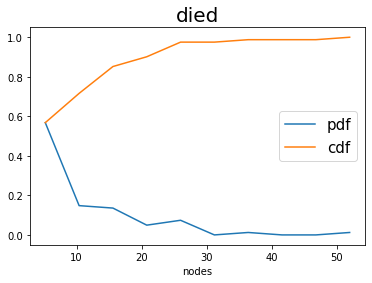

In [38]:
# cummulative distribution of survival and died patients by nodes

counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.title('survived', fontsize=20)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('nodes')
plt.legend(['pdf', 'cdf'],loc='center right', fontsize=15)
plt.show();

counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title('died', fontsize=20)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('nodes')
plt.legend(['pdf', 'cdf'],loc='center right', fontsize=15)
plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


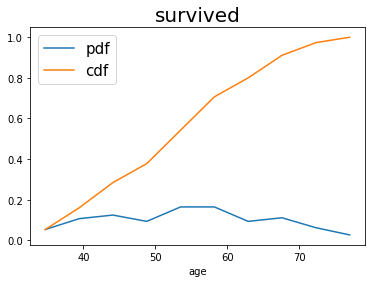

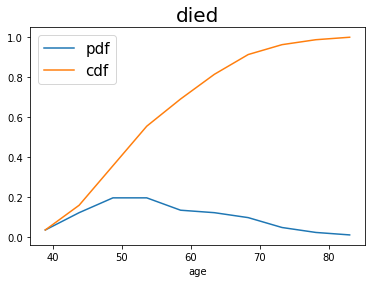

In [42]:
counts, bin_edges = np.histogram(haberman_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.title('survived', fontsize=20)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('age')
plt.legend(['pdf', 'cdf'], loc='upper left', fontsize=15)
plt.show();

counts, bin_edges = np.histogram(haberman_2['age'], bins=10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title('died', fontsize=20)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('age')
plt.legend(['pdf', 'cdf'], loc='upper left', fontsize=15)
plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


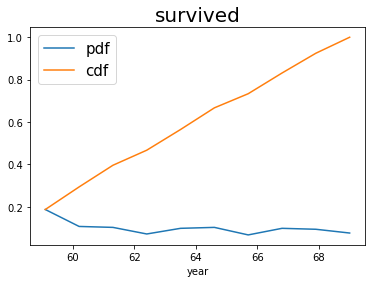

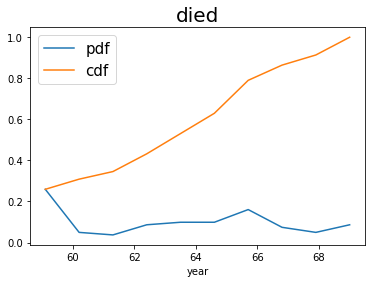

In [44]:
counts, bin_edges = np.histogram(haberman_1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.title('survived', fontsize=20)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('year')
plt.legend(['pdf', 'cdf'], loc='upper left', fontsize=15)
plt.show();

counts, bin_edges = np.histogram(haberman_2['year'], bins=10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title('died', fontsize=20)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('year')
plt.legend(['pdf', 'cdf'], loc='upper left', fontsize=15)
plt.show();

*   survival rate is more linear then died patient along the year.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


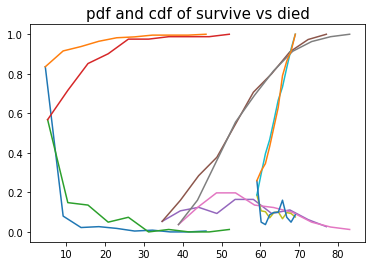

In [54]:
counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
# plt.show();

counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
# plt.show();

counts, bin_edges = np.histogram(haberman_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
# plt.show();

counts, bin_edges = np.histogram(haberman_2['age'], bins=10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
# plt.show();


counts, bin_edges = np.histogram(haberman_1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
# plt.show();

counts, bin_edges = np.histogram(haberman_2['year'], bins=10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('pdf and cdf of survive vs died', fontsize=15)
plt.show();

In [15]:
print("Means of survived:")
print('year- ',np.mean(haberman_1["year"]))
print('nodes- ',np.mean(haberman_1["nodes"]))
print('age- ',np.mean(haberman_1["age"]))

print("\nMeans of not survived:")
print('year- ',np.mean(haberman_2["year"]))
print('nodes- ',np.mean(haberman_2["nodes"]))
print('age- ',np.mean(haberman_2["age"]))

print("\nStd-dev of survived:");
print('year- ',np.std(haberman_1["year"]))
print('nodes- ',np.std(haberman_1["nodes"]))
print('age- ',np.std(haberman_1["age"]))

print("\nStd-dev of not survived:");
print('year- ',np.std(haberman_2["year"]))
print('nodes- ',np.std(haberman_2["nodes"]))
print('age- ',np.std(haberman_2["age"]))

Means of survived:
year-  62.86222222222222
nodes-  2.7911111111111113
age-  52.01777777777778

Means of not survived:
year-  62.82716049382716
nodes-  7.45679012345679
age-  53.67901234567901

Std-dev of survived:
year-  3.2157452144021956
nodes-  5.857258449412131
age-  10.98765547510051

Std-dev of not survived:
year-  3.3214236255207883
nodes-  9.128776076761632
age-  10.10418219303131


In [16]:
print("\nMedians nodes:")
print(np.median(haberman_1["nodes"]))
print(np.median(haberman_2["nodes"]))

print("\nMedians age:")
print(np.median(haberman_1["age"]))
print(np.median(haberman_2["age"]))


print("\nQuantiles nodes:")
print(np.percentile(haberman_1["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["nodes"],np.arange(0, 100, 25)))

print("\nQuantiles age:")
print(np.percentile(haberman_1["age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["age"],np.arange(0, 100, 25)))

print("\n90th Percentiles nodes:")
print(np.percentile(haberman_1["nodes"],90))
print(np.percentile(haberman_2["nodes"],90))

print("\n90th Percentiles age:")
print(np.percentile(haberman_1["age"],90))
print(np.percentile(haberman_2["age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation of nodes")
print(robust.mad(haberman_1["nodes"]))
print(robust.mad(haberman_2["nodes"]))

print ("\nMedian Absolute Deviation of age")
print(robust.mad(haberman_1["age"]))
print(robust.mad(haberman_2["age"]))


Medians nodes:
0.0
4.0

Medians age:
52.0
53.0

Quantiles nodes:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

Quantiles age:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles nodes:
8.0
20.0

90th Percentiles age:
67.0
67.0

Median Absolute Deviation of nodes
0.0
5.930408874022408

Median Absolute Deviation of age
13.343419966550417
11.860817748044816


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


* median of nodes shows that there is too many outliers in data points of nodes.

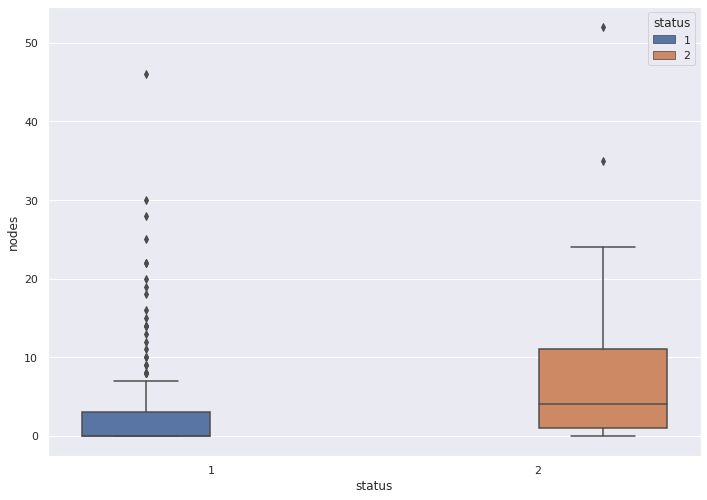

In [63]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='status',y='nodes', data=df, hue='status')
plt.show()

* 50% patients having around 2 nodes survived.
* 25% patients having 1 node, 50% having around 3 nodes and 75% having 10 nodes who died.

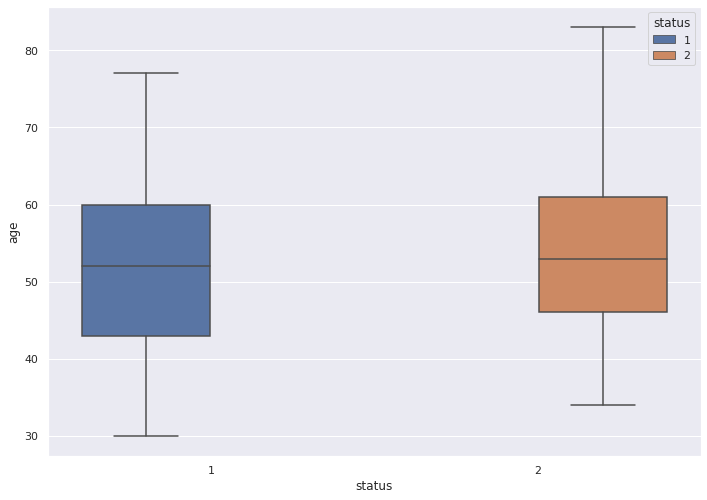

In [70]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='status',y='age', data=df, hue='status')
plt.show()

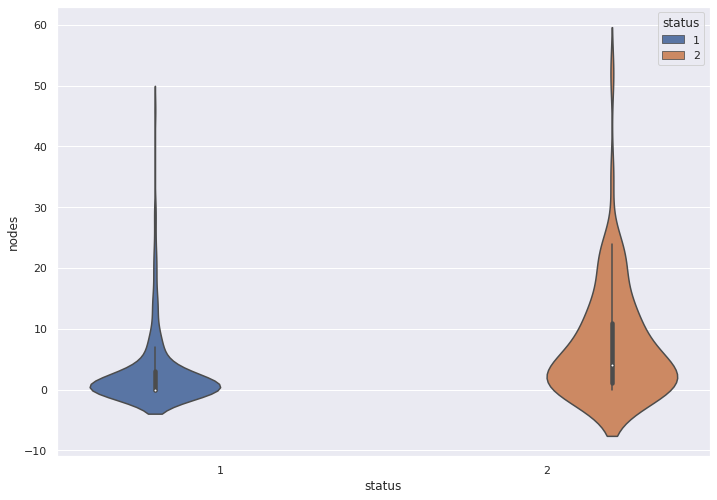

In [72]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(x="status", y="nodes", data=df, hue='status', size=8)
plt.show()

maximum patients survived who had nodes less than 10 in comparison to died patients.

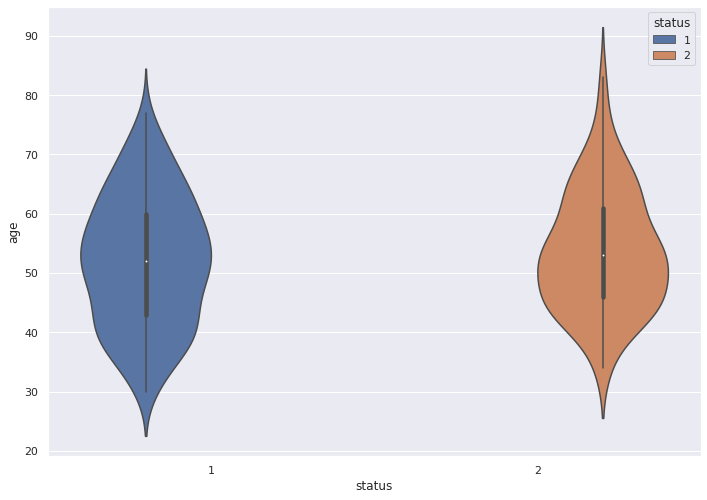

In [73]:
sns.violinplot(x="status", y="age", data=df, size=8, hue='status')
plt.show()

## CONCLOSION


*   There is no single best feature in this dataset to analyse survival rate exaclty.
*   patients having age less then 38 years are all survived.
*   patients who have age in 40-60 year and having nodes greater then 10 and operated in later years after 1950, there is more probability to survive a patient.